In [2]:
import pandas as pd
import numpy as np

import statsmodels.tsa.api as smt
from statsmodels.tsa.seasonal import seasonal_decompose  # Decomposition
from statsmodels.tsa.stattools import adfuller
#from stldecompose import decompose, forecast             # Decomposition & forecasting
#from statsmodels.tsa.holtwinters import ExponentialSmoothing #ETS Models

#from fbprophet import Prophet #you need to install fbprophet using pip install

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
electricty_data = pd.read_csv('D:/Analytics class/PROJECT/Machine lerning/13. Capstone Case Study - Demand Estimation/Electricity Consumption.csv')
electricty_data.head()

,DATE,Electricty_Consumption_in_TW
0,1/1/1973,35.9728
1,2/1/1973,36.1334
2,3/1/1973,35.0625
3,4/1/1973,33.8416
4,5/1/1973,33.5107


In [4]:
electricty_data.tail()

,DATE,Electricty_Consumption_in_TW
556,5/1/2019,97.5860
557,6/1/2019,110.8580
558,7/1/2019,122.1014
559,8/1/2019,121.7765
560,9/1/2019,109.7190


In [5]:
electricty_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   DATE                          561 non-null    object 
 1   Electricty_Consumption_in_TW  561 non-null    float64
dtypes: float64(1), object(1)
memory usage: 8.9+ KB


In [6]:
electricty_data.columns = ['Month_Year', 'consumption']

In [7]:
electricty_data['Month_Year'] = pd.to_datetime(electricty_data.Month_Year, format='%m/%d/%Y')

In [8]:
electricty_data

,Month_Year,consumption
0,1973-01-01,35.9728
1,1973-02-01,36.1334
2,1973-03-01,35.0625
3,1973-04-01,33.8416
4,1973-05-01,33.5107
...,...,...
556,2019-05-01,97.5860
557,2019-06-01,110.8580
558,2019-07-01,122.1014
559,2019-08-01,121.7765


In [9]:
electricty_data['year'] = electricty_data.Month_Year.dt.year
electricty_data['month'] = electricty_data.Month_Year.dt.month

In [10]:
electricty_data.head()

,Month_Year,consumption,year,month
0,1973-01-01,35.9728,1973,1
1,1973-02-01,36.1334,1973,2
2,1973-03-01,35.0625,1973,3
3,1973-04-01,33.8416,1973,4
4,1973-05-01,33.5107,1973,5


In [11]:
electricty_data.set_index(electricty_data.Month_Year, inplace=True)

In [12]:
ts = electricty_data.consumption
ts.head(2)

Month_Year
1973-01-01    35.9728
1973-02-01    36.1334
Name: consumption, dtype: float64

<AxesSubplot:xlabel='Month_Year'>

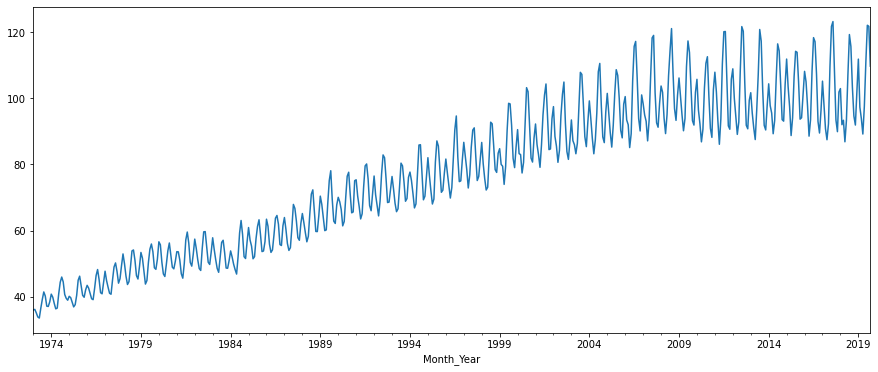

In [13]:
ts.plot(figsize = (15,6))

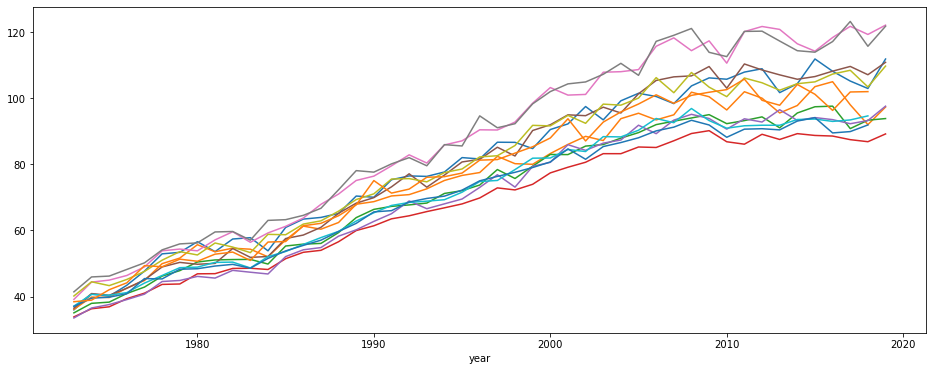

In [14]:
pivot_YM = pd.pivot_table(data = electricty_data, index = 'year', columns = 'month', values = 'consumption')
pivot_YM.plot(legend=False , figsize=(16,6))
plt.show()

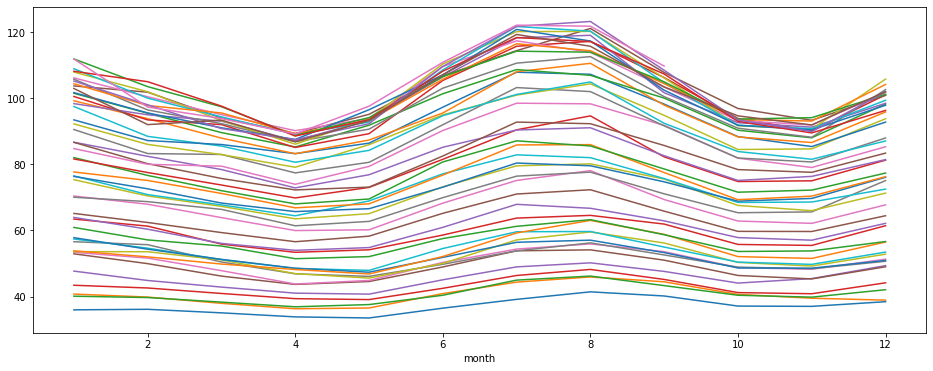

In [15]:
pivot_MY = pd.pivot_table(data = electricty_data, index = 'month', columns = 'year', values = 'consumption')
pivot_MY.plot(legend=False, figsize=(16,6))
plt.show()

## Decomposition

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [17]:
#decom = seasonal_decompose(ts, model='multiplicative')
decom = seasonal_decompose(ts, model='additive')

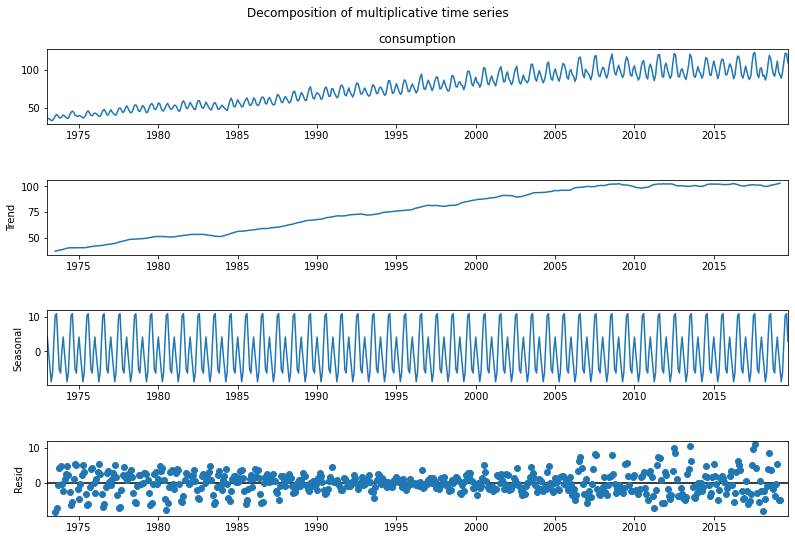

In [18]:
fig = decom.plot()
fig.set_figwidth(12)
fig.set_figheight(8)
fig.suptitle('Decomposition of multiplicative time series')
plt.show()

In [19]:
pd.concat([decom.observed, decom.trend, decom.seasonal, decom.resid], axis=1).head(12)

,consumption,trend,seasonal,resid
Month_Year,,,,
1973-01-01,35.9728,NaN,4.135755,NaN
1973-02-01,36.1334,NaN,-0.705922,NaN
1973-03-01,35.0625,NaN,-4.489678,NaN
1973-04-01,33.8416,NaN,-8.668415,NaN
1973-05-01,33.5107,NaN,-6.044817,NaN
1973-06-01,36.4823,NaN,2.943116,NaN
1973-07-01,39.1412,37.223388,10.277826,-8.360014
1973-08-01,41.4137,37.576442,10.828421,-6.991163
1973-09-01,40.1639,37.850562,2.891998,-0.578660


In [20]:
from statsmodels.tsa.stattools import acf, pacf_ols

In [21]:
acf(ts)

C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:652: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


array([1.        , 0.95647392, 0.87822982, 0.82945315, 0.841529  ,
       0.88813059, 0.91122643, 0.88196658, 0.82805401, 0.80579718,
       0.84356484, 0.9092393 , 0.94048579, 0.90057994, 0.82617458,
       0.77958655, 0.79320802, 0.8397309 , 0.86221357, 0.83379379,
       0.78177625, 0.76069374, 0.79757444, 0.8619873 , 0.89139636,
       0.85166914, 0.77857553, 0.73313065, 0.74640927, 0.79162819,
       0.81316289, 0.78520664, 0.73310236, 0.71201771, 0.74767556,
       0.80929857, 0.83784094, 0.79920595, 0.72847833, 0.6849164 ,
       0.69784608])

In [22]:
pacf_ols(ts)

C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:881: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(


array([ 1.        ,  0.96010214, -0.46239143,  0.68714216,  0.45886201,
        0.1559856 , -0.18798794, -0.01014574,  0.18169407,  0.49156644,
        0.49933306,  0.5094987 ,  0.37656677, -0.41925301, -0.05163282,
       -0.13345659,  0.11005347, -0.00342721, -0.02550308,  0.01845861,
       -0.0503431 , -0.00971101,  0.057987  ,  0.2401917 ,  0.1500228 ,
       -0.12035626, -0.01871735, -0.05644169, -0.00463219, -0.06631367,
        0.0409564 ,  0.02993122, -0.04493081,  0.10883131,  0.00458799,
        0.13946451,  0.10968151, -0.18123046, -0.01554567, -0.0029174 ,
       -0.07123474])

In [23]:
import statsmodels.tsa.api as smt

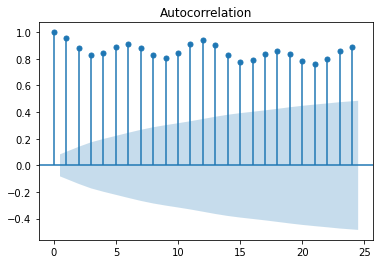

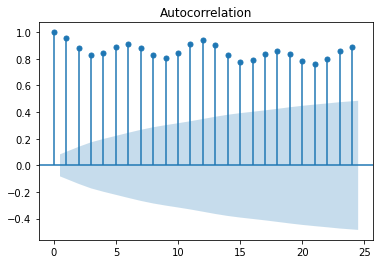

In [24]:
smt.graphics.plot_acf(ts, lags=24)

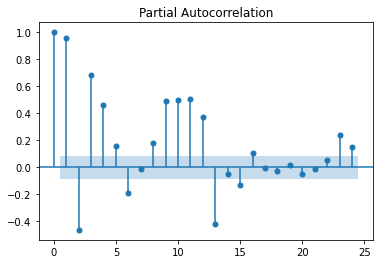

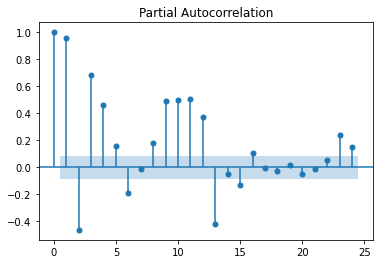

In [25]:
smt.graphics.plot_pacf(ts, lags = 24, method='ols')

In [26]:
#Is the series stationary?

# Performing Dickey-Fuller test:

from statsmodels.tsa.stattools import adfuller

adfuller(ts)   

#p-value: 0.41032  , since p-value is high, the series(ts) is not stationary

(-1.740593372983239,
 0.41032816044687054,
 15,
 545,
 {'1%': -3.442405720052601,
  '5%': -2.866857804790472,
  '10%': -2.5696022094099824},
 2295.409663118043)

In [126]:
ts_diff = ts.diff(1)

In [128]:
adfuller(ts_diff.dropna()) 

#p-value=3.3013438021519147e-12, since p-value<0.05, the series (ts_diff) is stationary series

(-7.94166536398116,
 3.3013438021519147e-12,
 14,
 545,
 {'1%': -3.442405720052601,
  '5%': -2.866857804790472,
  '10%': -2.5696022094099824},
 2292.555416618966)

<AxesSubplot:xlabel='Month_Year'>

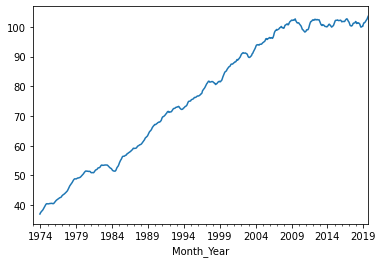

In [129]:
# Moving average

ts.rolling(window=12).mean().plot()

## ETS models

In [53]:
# Importing packages
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error , mean_squared_error

In [37]:
# UDF to find best values of alpha, beta and gamma

def auto_hwm(timeseries, val_split_date, alpha=[None], beta=[None], gamma=[None], 
              trend=None, seasonal=None, periods=None, verbose=False):

    best_params = []
    actual = timeseries[val_split_date:]

    print('Evaluating Exponential Smoothing model for', len(alpha) * len(beta) * len(gamma), 'fits\n')

    for a in alpha:
        for b in beta:
            for g in gamma:

                    if(verbose == True):
                        print('Checking for', {'alpha': a, 'beta': b, 'gamma': g})

                    model = ExponentialSmoothing(timeseries, trend=trend, seasonal=seasonal, seasonal_periods=periods)
                    model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
                    f_cast = model.predict(model.params, start=actual.index[0])
                    score = np.where(np.float64(mean_absolute_error(actual, f_cast)/actual).mean()>0,np.float64(mean_absolute_error(actual, f_cast)/actual).mean(),0)

                    best_params.append({'alpha': a, 'beta': b, 'gamma': g, 'mae': score})

    return min(best_params, key=lambda x: x['mae'])

In [40]:
alpha = [0.1,0.2,0.3,0.4]
beta = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
gamma =[0.1,0.2,0.3,0.4,0.5,0.6]

In [41]:
ts.tail()

Month_Year
2019-05-01     97.5860
2019-06-01    110.8580
2019-07-01    122.1014
2019-08-01    121.7765
2019-09-01    109.7190
Name: consumption, dtype: float64

In [42]:
auto_hwm(ts, val_split_date ='2019-01-01' , alpha=alpha, beta=beta, gamma=gamma, 
         trend='mul', seasonal='mul', periods=12, verbose=True)

Evaluating Exponential Smoothing model for 216 fits

Checking for {'alpha': 0.1, 'beta': 0.1, 'gamma': 0.1}
Checking for {'alpha': 0.1, 'beta': 0.1, 'gamma': 0.2}
Checking for {'alpha': 0.1, 'beta': 0.1, 'gamma': 0.3}
Checking for {'alpha': 0.1, 'beta': 0.1, 'gamma': 0.4}
Checking for {'alpha': 0.1, 'beta': 0.1, 'gamma': 0.5}


C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-37-402278d55569>:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\aksha\anaconda3\lib\s

Checking for {'alpha': 0.1, 'beta': 0.1, 'gamma': 0.6}
Checking for {'alpha': 0.1, 'beta': 0.2, 'gamma': 0.1}
Checking for {'alpha': 0.1, 'beta': 0.2, 'gamma': 0.2}
Checking for {'alpha': 0.1, 'beta': 0.2, 'gamma': 0.3}
Checking for {'alpha': 0.1, 'beta': 0.2, 'gamma': 0.4}
Checking for {'alpha': 0.1, 'beta': 0.2, 'gamma': 0.5}


C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-37-402278d55569>:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\aksha\anaconda3\lib\s

Checking for {'alpha': 0.1, 'beta': 0.2, 'gamma': 0.6}
Checking for {'alpha': 0.1, 'beta': 0.3, 'gamma': 0.1}
Checking for {'alpha': 0.1, 'beta': 0.3, 'gamma': 0.2}
Checking for {'alpha': 0.1, 'beta': 0.3, 'gamma': 0.3}
Checking for {'alpha': 0.1, 'beta': 0.3, 'gamma': 0.4}


C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-37-402278d55569>:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\aksha\anaconda3\lib\s

Checking for {'alpha': 0.1, 'beta': 0.3, 'gamma': 0.5}
Checking for {'alpha': 0.1, 'beta': 0.3, 'gamma': 0.6}
Checking for {'alpha': 0.1, 'beta': 0.4, 'gamma': 0.1}
Checking for {'alpha': 0.1, 'beta': 0.4, 'gamma': 0.2}
Checking for {'alpha': 0.1, 'beta': 0.4, 'gamma': 0.3}
Checking for {'alpha': 0.1, 'beta': 0.4, 'gamma': 0.4}


C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-37-402278d55569>:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\aksha\anaconda3\lib\s

Checking for {'alpha': 0.1, 'beta': 0.4, 'gamma': 0.5}
Checking for {'alpha': 0.1, 'beta': 0.4, 'gamma': 0.6}
Checking for {'alpha': 0.1, 'beta': 0.5, 'gamma': 0.1}
Checking for {'alpha': 0.1, 'beta': 0.5, 'gamma': 0.2}
Checking for {'alpha': 0.1, 'beta': 0.5, 'gamma': 0.3}
Checking for {'alpha': 0.1, 'beta': 0.5, 'gamma': 0.4}
Checking for {'alpha': 0.1, 'beta': 0.5, 'gamma': 0.5}


C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-37-402278d55569>:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\aksha\anaconda3\lib\s

Checking for {'alpha': 0.1, 'beta': 0.5, 'gamma': 0.6}
Checking for {'alpha': 0.1, 'beta': 0.6, 'gamma': 0.1}
Checking for {'alpha': 0.1, 'beta': 0.6, 'gamma': 0.2}
Checking for {'alpha': 0.1, 'beta': 0.6, 'gamma': 0.3}
Checking for {'alpha': 0.1, 'beta': 0.6, 'gamma': 0.4}
Checking for {'alpha': 0.1, 'beta': 0.6, 'gamma': 0.5}


C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-37-402278d55569>:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\aksha\anaconda3\lib\s

Checking for {'alpha': 0.1, 'beta': 0.6, 'gamma': 0.6}
Checking for {'alpha': 0.1, 'beta': 0.7, 'gamma': 0.1}
Checking for {'alpha': 0.1, 'beta': 0.7, 'gamma': 0.2}
Checking for {'alpha': 0.1, 'beta': 0.7, 'gamma': 0.3}
Checking for {'alpha': 0.1, 'beta': 0.7, 'gamma': 0.4}
Checking for {'alpha': 0.1, 'beta': 0.7, 'gamma': 0.5}
Checking for {'alpha': 0.1, 'beta': 0.7, 'gamma': 0.6}
Checking for {'alpha': 0.1, 'beta': 0.8, 'gamma': 0.1}
Checking for {'alpha': 0.1, 'beta': 0.8, 'gamma': 0.2}
Checking for {'alpha': 0.1, 'beta': 0.8, 'gamma': 0.3}
Checking for {'alpha': 0.1, 'beta': 0.8, 'gamma': 0.4}
Checking for {'alpha': 0.1, 'beta': 0.8, 'gamma': 0.5}
Checking for {'alpha': 0.1, 'beta': 0.8, 'gamma': 0.6}
Checking for {'alpha': 0.1, 'beta': 0.9, 'gamma': 0.1}


C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-37-402278d55569>:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\aksha\anaconda3\lib\s

Checking for {'alpha': 0.1, 'beta': 0.9, 'gamma': 0.2}
Checking for {'alpha': 0.1, 'beta': 0.9, 'gamma': 0.3}
Checking for {'alpha': 0.1, 'beta': 0.9, 'gamma': 0.4}
Checking for {'alpha': 0.1, 'beta': 0.9, 'gamma': 0.5}
Checking for {'alpha': 0.1, 'beta': 0.9, 'gamma': 0.6}
Checking for {'alpha': 0.2, 'beta': 0.1, 'gamma': 0.1}
Checking for {'alpha': 0.2, 'beta': 0.1, 'gamma': 0.2}


C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-37-402278d55569>:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\aksha\anaconda3\lib\s

Checking for {'alpha': 0.2, 'beta': 0.1, 'gamma': 0.3}
Checking for {'alpha': 0.2, 'beta': 0.1, 'gamma': 0.4}
Checking for {'alpha': 0.2, 'beta': 0.1, 'gamma': 0.5}
Checking for {'alpha': 0.2, 'beta': 0.1, 'gamma': 0.6}
Checking for {'alpha': 0.2, 'beta': 0.2, 'gamma': 0.1}
Checking for

C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-37-402278d55569>:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\aksha\anaconda3\lib\s

 {'alpha': 0.2, 'beta': 0.2, 'gamma': 0.2}
Checking for {'alpha': 0.2, 'beta': 0.2, 'gamma': 0.3}
Checking for {'alpha': 0.2, 'beta': 0.2, 'gamma': 0.4}
Checking for {'alpha': 0.2, 'beta': 0.2, 'gamma': 0.5}
Checking for {'alpha': 0.2, 'beta': 0.2, 'gamma': 0.6}
Checking for {'alpha': 0.2, 'beta': 0.3, 'gamma': 0.1}
Checking for {'alpha': 0.2, 'beta': 0.3, 'gamma': 0.2}


C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-37-402278d55569>:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\aksha\anaconda3\lib\s

Checking for {'alpha': 0.2, 'beta': 0.3, 'gamma': 0.3}
Checking for {'alpha': 0.2, 'beta': 0.3, 'gamma': 0.4}
Checking for {'alpha': 0.2, 'beta': 0.3, 'gamma': 0.5}
Checking for {'alpha': 0.2, 'beta': 0.3, 'gamma': 0.6}
Checking for {'alpha': 0.2, 'beta': 0.4, 'gamma': 0.1}
Checking for {'alpha': 0.2, 'beta': 0.4, 'gamma': 0.2}


C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-37-402278d55569>:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No 

Checking for {'alpha': 0.2, 'beta': 0.4, 'gamma': 0.3}
Checking for {'alpha': 0.2, 'beta': 0.4, 'gamma': 0.4}
Checking for {'alpha': 0.2, 'beta': 0.4, 'gamma': 0.5}
Checking for {'alpha': 0.2, 'beta': 0.4, 'gamma': 0.6}
Checking for {'alpha': 0.2, 'beta': 0.5, 'gamma': 0.1}
Checking for {'alpha': 0.2, 'beta': 0.5, 'gamma': 0.2}
Checking for {'alpha': 0.2, 'beta': 0.5, 'gamma': 0.3}


C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-37-402278d55569>:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-37-402278d55569>:19: FutureWarning: the 'smoothing_slope'' 

Checking for {'alpha': 0.2, 'beta': 0.5, 'gamma': 0.4}
Checking for {'alpha': 0.2, 'beta': 0.5, 'gamma': 0.5}
Checking for {'alpha': 0.2, 'beta': 0.5, 'gamma': 0.6}
Checking for {'alpha': 0.2, 'beta': 0.6, 'gamma': 0.1}
Checking for {'alpha': 0.2, 'beta': 0.6, 'gamma': 0.2}
Checking for {'alpha': 0.2, 'beta': 0.6, 'gamma': 0.3}


C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-37-402278d55569>:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\aksha\anaconda3\lib\s

Checking for {'alpha': 0.2, 'beta': 0.6, 'gamma': 0.4}
Checking for {'alpha': 0.2, 'beta': 0.6, 'gamma': 0.5}
Checking for {'alpha': 0.2, 'beta': 0.6, 'gamma': 0.6}
Checking for {'alpha': 0.2, 'beta': 0.7, 'gamma': 0.1}
Checking for {'alpha': 0.2, 'beta': 0.7, 'gamma': 0.2}


C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-37-402278d55569>:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No 

Checking for {'alpha': 0.2, 'beta': 0.7, 'gamma': 0.3}
Checking for {'alpha': 0.2, 'beta': 0.7, 'gamma': 0.4}
Checking for {'alpha': 0.2, 'beta': 0.7, 'gamma': 0.5}
Checking for {'alpha': 0.2, 'beta': 0.7, 'gamma': 0.6}
Checking for {'alpha': 0.2, 'beta': 0.8, 'gamma': 0.1}
Checking for {'alpha': 0.2, 'beta': 0.8, 'gamma': 0.2}


C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-37-402278d55569>:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\aksha\anaconda3\lib\s

Checking for {'alpha': 0.2, 'beta': 0.8, 'gamma': 0.3}
Checking for {'alpha': 0.2, 'beta': 0.8, 'gamma': 0.4}
Checking for {'alpha': 0.2, 'beta': 0.8, 'gamma': 0.5}
Checking for {'alpha': 0.2, 'beta': 0.8, 'gamma': 0.6}
Checking for {'alpha': 0.2, 'beta': 0.9, 'gamma': 0.1}
Checking for {'alpha': 0.2, 'beta': 0.9, 'gamma': 0.2}
Checking for {'alpha': 0.2, 'beta': 0.9, 'gamma': 0.3}

C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-37-402278d55569>:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:


Checking for {'alpha': 0.2, 'beta': 0.9, 'gamma': 0.4}
Checking for {'alpha': 0.2, 'beta': 0.9, 'gamma': 0.5}
Checking for {'alpha': 0.2, 'beta': 0.9, 'gamma': 0.6}
Checking for {'alpha': 0.3, 'beta': 0.1, 'gamma': 0.1}
Checking for {'alpha': 0.3, 'beta': 0.1, 'gamma': 0.2}
Checking for {'alpha': 0.3, 'beta': 0.1, 'gamma': 0.3}


C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-37-402278d55569>:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users

Checking for {'alpha': 0.3, 'beta': 0.1, 'gamma': 0.4}
Checking for {'alpha': 0.3, 'beta': 0.1, 'gamma': 0.5}
Checking for {'alpha': 0.3, 'beta': 0.1, 'gamma': 0.6}
Checking for {'alpha': 0.3, 'beta': 0.2, 'gamma': 0.1}
Checking for {'alpha': 0.3, 'beta': 0.2, 'gamma': 0.2}


C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-37-402278d55569>:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\aksha\anaconda3\lib\s

Checking for {'alpha': 0.3, 'beta': 0.2, 'gamma': 0.3}
Checking for {'alpha': 0.3, 'beta': 0.2, 'gamma': 0.4}
Checking for {'alpha': 0.3, 'beta': 0.2, 'gamma': 0.5}
Checking for {'alpha': 0.3, 'beta': 0.2, 'gamma': 0.6}
Checking for {'alpha': 0.3, 'beta': 0.3, 'gamma': 0.1}
Checking for {'alpha': 0.3, 'beta': 0.3, 'gamma': 0.2}


C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-37-402278d55569>:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\aksha\anaconda3\lib\s

Checking for {'alpha': 0.3, 'beta': 0.3, 'gamma': 0.3}
Checking for {'alpha': 0.3, 'beta': 0.3, 'gamma': 0.4}
Checking for {'alpha': 0.3, 'beta': 0.3, 'gamma': 0.5}
Checking for {'alpha': 0.3, 'beta': 0.3, 'gamma': 0.6}
Checking for {'alpha': 0.3, 'beta': 0.4, 'gamma': 0.1}


C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-37-402278d55569>:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\aksha\anaconda3\lib\s

Checking for {'alpha': 0.3, 'beta': 0.4, 'gamma': 0.2}
Checking for {'alpha': 0.3, 'beta': 0.4, 'gamma': 0.3}
Checking for {'alpha': 0.3, 'beta': 0.4, 'gamma': 0.4}
Checking for {'alpha': 0.3, 'beta': 0.4, 'gamma': 0.5}
Checking for {'alpha': 0.3, 'beta': 0.4, 'gamma': 0.6}


C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-37-402278d55569>:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\aksha\anaconda3\lib\s

Checking for {'alpha': 0.3, 'beta': 0.5, 'gamma': 0.1}
Checking for {'alpha': 0.3, 'beta': 0.5, 'gamma': 0.2}
Checking for {'alpha': 0.3, 'beta': 0.5, 'gamma': 0.3}
Checking for {'alpha': 0.3, 'beta': 0.5, 'gamma': 0.4}
Checking for {'alpha': 0.3, 'beta': 0.5, 'gamma': 0.5}


C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-37-402278d55569>:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\aksha\anaconda3\lib\s

Checking for {'alpha': 0.3, 'beta': 0.5, 'gamma': 0.6}
Checking for {'alpha': 0.3, 'beta': 0.6, 'gamma': 0.1}
Checking for {'alpha': 0.3, 'beta': 0.6, 'gamma': 0.2}
Checking for {'alpha': 0.3, 'beta': 0.6, 'gamma': 0.3}
Checking for {'alpha': 0.3, 'beta': 0.6, 'gamma': 0.4}
Checking for {'alpha': 0.3, 'beta': 0.6, 'gamma': 0.5}


C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-37-402278d55569>:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No 

Checking for {'alpha': 0.3, 'beta': 0.6, 'gamma': 0.6}
Checking for {'alpha': 0.3, 'beta': 0.7, 'gamma': 0.1}
Checking for {'alpha': 0.3, 'beta': 0.7, 'gamma': 0.2}
Checking for {'alpha': 0.3, 'beta': 0.7, 'gamma': 0.3}
Checking for {'alpha': 0.3, 'beta': 0.7, 'gamma': 0.4}


C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-37-402278d55569>:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipyt

Checking for {'alpha': 0.3, 'beta': 0.7, 'gamma': 0.5}
Checking for {'alpha': 0.3, 'beta': 0.7, 'gamma': 0.6}
Checking for {'alpha': 0.3, 'beta': 0.8, 'gamma': 0.1}
Checking for {'alpha': 0.3, 'beta': 0.8, 'gamma': 0.2}
Checking for {'alpha': 0.3, 'beta': 0.8, 'gamma': 0.3}
Checking for {'alpha': 0.3, 'beta': 0.8, 'gamma': 0.4}
Checking for {'alpha': 0.3, 'beta': 0.8, 'gamma': 0.5}
Checking for {'alpha': 0.3, 'beta': 0.8, 'gamma': 0.6}


C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-37-402278d55569>:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\

Checking for {'alpha': 0.3, 'beta': 0.9, 'gamma': 0.1}
Checking for {'alpha': 0.3, 'beta': 0.9, 'gamma': 0.2}
Checking for {'alpha': 0.3, 'beta': 0.9, 'gamma': 0.3}
Checking for {'alpha': 0.3, 'beta': 0.9, 'gamma': 0.4}
Checking for {'alpha': 0.3, 'beta': 0.9, 'gamma': 0.5}
Checking for {'alpha': 0.3, 'beta': 0.9, 'gamma': 0.6}
Checking for {'alpha': 0.4, 'beta': 0.1, 'gamma': 0.1}
Checking for {'alpha': 0.4, 'beta': 0.1, 'gamma': 0.2}


C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-37-402278d55569>:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users

Checking for {'alpha': 0.4, 'beta': 0.1, 'gamma': 0.3}
Checking for {'alpha': 0.4, 'beta': 0.1, 'gamma': 0.4}
Checking for {'alpha': 0.4, 'beta': 0.1, 'gamma': 0.5}
Checking for {'alpha': 0.4, 'beta': 0.1, 'gamma': 0.6}
Checking for {'alpha': 0.4, 'beta': 0.2, 'gamma': 0.1}


C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-37-402278d55569>:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\aksha\anaconda3\lib\s

Checking for {'alpha': 0.4, 'beta': 0.2, 'gamma': 0.2}
Checking for {'alpha': 0.4, 'beta': 0.2, 'gamma': 0.3}
Checking for {'alpha': 0.4, 'beta': 0.2, 'gamma': 0.4}
Checking for {'alpha': 0.4, 'beta': 0.2, 'gamma': 0.5}
Checking for {'alpha': 0.4, 'beta': 0.2, 'gamma': 0.6}
Checking for {'alpha': 0.4, 'beta': 0.3, 'gamma': 0.1}


C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-37-402278d55569>:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\aksha\anaconda3\lib\s

Checking for {'alpha': 0.4, 'beta': 0.3, 'gamma': 0.2}
Checking for {'alpha': 0.4, 'beta': 0.3, 'gamma': 0.3}
Checking for {'alpha': 0.4, 'beta': 0.3, 'gamma': 0.4}
Checking for {'alpha': 0.4, 'beta': 0.3, 'gamma': 0.5}
Checking for {'alpha': 0.4, 'beta': 0.3, 'gamma': 0.6}


C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-37-402278d55569>:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\aksha\anaconda3\lib\s

Checking for {'alpha': 0.4, 'beta': 0.4, 'gamma': 0.1}
Checking for {'alpha': 0.4, 'beta': 0.4, 'gamma': 0.2}
Checking for {'alpha': 0.4, 'beta': 0.4, 'gamma': 0.3}
Checking for {'alpha': 0.4, 'beta': 0.4, 'gamma': 0.4}
Checking for {'alpha': 0.4, 'beta': 0.4, 'gamma': 0.5}
Checking for

C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-37-402278d55569>:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\aksha\anaconda3\lib\s

 {'alpha': 0.4, 'beta': 0.4, 'gamma': 0.6}
Checking for {'alpha': 0.4, 'beta': 0.5, 'gamma': 0.1}
Checking for {'alpha': 0.4, 'beta': 0.5, 'gamma': 0.2}
Checking for {'alpha': 0.4, 'beta': 0.5, 'gamma': 0.3}


C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-37-402278d55569>:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:

Checking for {'alpha': 0.4, 'beta': 0.5, 'gamma': 0.4}
Checking for {'alpha': 0.4, 'beta': 0.5, 'gamma': 0.5}
Checking for {'alpha': 0.4, 'beta': 0.5, 'gamma': 0.6}
Checking for {'alpha': 0.4, 'beta': 0.6, 'gamma': 0.1}
Checking for {'alpha': 0.4, 'beta': 0.6, 'gamma': 0.2}
Checking for {'alpha': 0.4, 'beta': 0.6, 'gamma': 0.3}
Checking for {'alpha': 0.4, 'beta': 0.6, 'gamma': 0.4}
Checking for {'alpha': 0.4, 'beta': 0.6, 'gamma': 0.5}
Checking for {'alpha': 0.4, 'beta': 0.6, 'gamma': 0.6}
Checking for {'alpha': 0.4, 'beta': 0.7, 'gamma': 0.1}
Checking for {'alpha': 0.4, 'beta': 0.7, 'gamma': 0.2}
Checking for {'alpha': 0.4, 'beta': 0.7, 'gamma': 0.3}


C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-37-402278d55569>:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users

Checking for {'alpha': 0.4, 'beta': 0.7, 'gamma': 0.4}
Checking for {'alpha': 0.4, 'beta': 0.7, 'gamma': 0.5}
Checking for {'alpha': 0.4, 'beta': 0.7, 'gamma': 0.6}
Checking for {'alpha': 0.4, 'beta': 0.8, 'gamma': 0.1}
Checking for {'alpha': 0.4, 'beta': 0.8, 'gamma': 0.2}
Checking for {'alpha': 0.4, 'beta': 0.8, 'gamma': 0.3}
Checking for {'alpha': 0.4, 'beta': 0.8, 'gamma': 0.4}
Checking for {'alpha': 0.4, 'beta': 0.8, 'gamma': 0.5}
Checking for {'alpha': 0.4, 'beta': 0.8, 'gamma': 0.6}


C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-37-402278d55569>:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\

Checking for {'alpha': 0.4, 'beta': 0.9, 'gamma': 0.1}
Checking for {'alpha': 0.4, 'beta': 0.9, 'gamma': 0.2}
Checking for {'alpha': 0.4, 'beta': 0.9, 'gamma': 0.3}
Checking for {'alpha': 0.4, 'beta': 0.9, 'gamma': 0.4}
Checking for {'alpha': 0.4, 'beta': 0.9, 'gamma': 0.5}
Checking for {'alpha': 0.4, 'beta': 0.9, 'gamma': 0.6}


C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-37-402278d55569>:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users

{'alpha': 0.1, 'beta': 0.5, 'gamma': 0.2, 'mae': array(0.01382954)}

In [43]:
# splitting the data in train and test
train = ts[:'2018-12-01']  
test = ts['2019-01-01':]

In [45]:
ets_model_train = ExponentialSmoothing(train, trend='mul', seasonal='mul', seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.5, smoothing_seasonal=0.2)

print(ets_model.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:              consumption   No. Observations:                  552
Model:             ExponentialSmoothing   SSE                           3389.442
Optimized:                         True   AIC                           1033.810
Trend:                   Multiplicative   BIC                           1102.826
Seasonal:                Multiplicative   AICC                          1035.093
Seasonal Periods:                    12   Date:                 Sun, 18 Jul 2021
Box-Cox:                          False   Time:                         13:06:53
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.1000000                alpha                False
smoothing_trend          

C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
<ipython-input-45-b68debe5f921>:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  ets_model = ExponentialSmoothing(train, trend='mul', seasonal='mul', seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.5, smoothing_seasonal=0.2)


In [51]:
# Prediction for test data
etd_pred_test = ets_model.forecast(9)

# Prediction for train data
etd_pred_train = ets_model.fittedvalues[:'2018-12-01']

In [58]:
#Metrics for both training and testing data 

#Mean Absolute Percentage Error 
MAPE_train = np.mean(np.abs(train -etd_pred_train)/train)
MAPE_test = np.mean(np.abs(test- etd_pred_test)/test)
print('MAPE of training data: ', MAPE_train,  ' | ', 'MAPE of testing data: ', MAPE_test)

#Root Mean Squared percentage error
RMSPE_train = np.sqrt(np.mean(np.square((train - etd_pred_train) / train)))
RMSPE_train = np.sqrt(np.mean(np.square((train - etd_pred_train) / train)))
print('RMSPE of training data: ', RMSPE_train,  ' | ', 'RMSPE of testing data: ', RMSPE_train)

MAPE of training data:  0.024013402040061593  |  MAPE of testing data:  0.029113876857668943
RMSPE of training data:  0.030965002803561764  |  RMSPE of testing data:  0.030965002803561764


In [59]:
ets_model = ExponentialSmoothing(ts, trend='mul', seasonal='mul', seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.6, smoothing_seasonal=0.2)

C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-59-46b452c685c8>:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  ets_model = ExponentialSmoothing(ts, trend='mul', seasonal='mul', seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.6, smoothing_seasonal=0.2)
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [93]:
ETS_forcast_2years = (ets_model.forecast(24))
ETS_forcast_2years

2019-10-01     98.502551
2019-11-01     96.689990
2019-12-01    107.466533
2020-01-01    114.475623
2020-02-01    105.479011
2020-03-01    101.625597
2020-04-01     95.957349
2020-05-01    103.182474
2020-06-01    119.054074
2020-07-01    131.718523
2020-08-01    131.249905
2020-09-01    118.302846
2020-10-01    105.589372
2020-11-01    103.646404
2020-12-01    115.198272
2021-01-01    122.711635
2021-02-01    113.067756
2021-03-01    108.937106
2021-04-01    102.861053
2021-05-01    110.605994
2021-06-01    127.619485
2021-07-01    141.195084
2021-08-01    140.692751
2021-09-01    126.814209
Freq: MS, dtype: float64

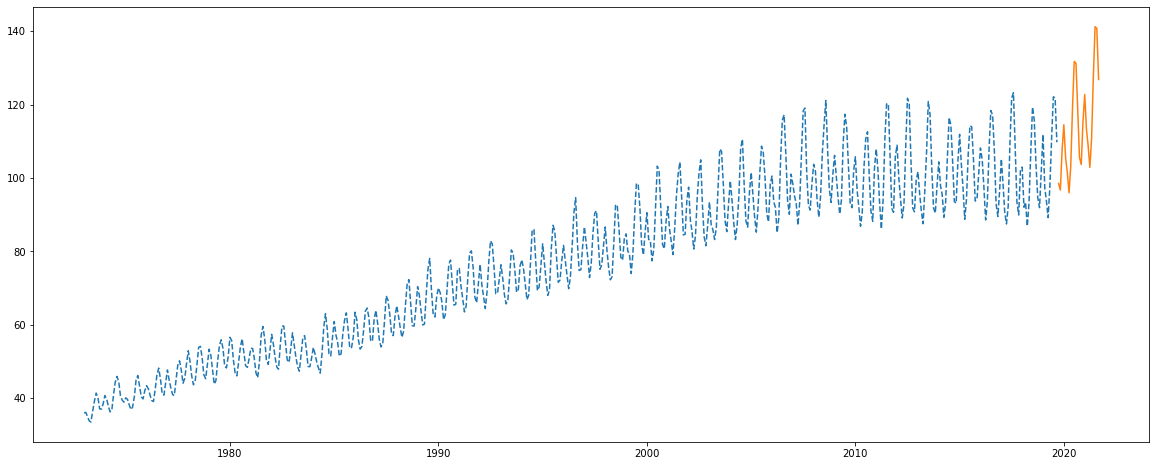

In [97]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
plt.plot(ts, '--', label='obs')
plt.plot(ETS_forcast_2years, '-', label=ETS_forcast_2years)

## SARIMA

In [110]:
# Data Preperation

train = ts[:'2018-12-01']
test = ts['2019-01-01':]

In [104]:
# UDF for best parameters for SARIMA

import statsmodels.api as sm
import sys
import itertools
import warnings

def auto_arima(timeseries, regressors=None, p=range(0, 2), d=range(0, 2), q=range(0, 2),
              P=range(0, 2), D=range(0, 1), Q=range(0, 2)):

    # Generate all different combinations of p, d and q triplets
    pdq = list(itertools.product(p, d, q))

    # Generate all different combinations of seasonal p, q and q triplets
    seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(P, D, Q))]
    
    warnings.filterwarnings("ignore") # specify to ignore warning messages

    best_aic = np.inf
    best_pdq = None
    best_seasonal_pdq = None
    best_results = None
    
    for param in pdq:
        for param_seasonal in seasonal_pdq:

            try:
                temp_model = sm.tsa.statespace.SARIMAX(endog=timeseries,
                                                 exog=regressors,
                                                 order = param,
                                                 seasonal_order = param_seasonal,
                                                 enforce_stationarity=False,
                                                 enforce_invertibility=False)
                temp_results = temp_model.fit()

                print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, temp_results.aic))
                
                if temp_results.aic < best_aic:
                    best_aic = temp_results.aic
                    best_pdq = param
                    best_seasonal_pdq = param_seasonal
                    best_results = temp_results
                
            except:
                #print("Unexpected error:", sys.exc_info()[0])
                continue
    print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))
    print(best_results.summary().tables[0])
    print(best_results.summary().tables[1])
    #return best_results

In [105]:
# checking for best parameters 

best_results = auto_arima(ts,  p=range(0, 3), d=range(2, 3), q=range(0, 3),
                         P=range(0, 3), D=range(0, 2), Q=range(0, 3)) 

SARIMAX(0, 2, 0)x(0, 0, 0, 12)12 - AIC:3718.1029653666437
SARIMAX(0, 2, 0)x(0, 0, 1, 12)12 - AIC:3307.819685419027
SARIMAX(0, 2, 0)x(0, 0, 2, 12)12 - AIC:3119.630196552929
SARIMAX(0, 2, 0)x(0, 1, 0, 12)12 - AIC:2935.702460760634
SARIMAX(0, 2, 0)x(0, 1, 1, 12)12 - AIC:2674.5635594623027
SARIMAX(0, 2, 0)x(0, 1, 2, 12)12 - AIC:2623.577288053826
SARIMAX(0, 2, 0)x(1, 0, 0, 12)12 - AIC:2916.1904079342657
SARIMAX(0, 2, 0)x(1, 0, 1, 12)12 - AIC:2707.844350488701
SARIMAX(0, 2, 0)x(1, 0, 2, 12)12 - AIC:2655.3010940081203
SARIMAX(0, 2, 0)x(1, 1, 0, 12)12 - AIC:2796.0014960862636
SARIMAX(0, 2, 0)x(1, 1, 1, 12)12 - AIC:2676.5611814424574
SARIMAX(0, 2, 0)x(1, 1, 2, 12)12 - AIC:2623.2457866427144
SARIMAX(0, 2, 0)x(2, 0, 0, 12)12 - AIC:2792.259919408245
SARIMAX(0, 2, 0)x(2, 0, 1, 12)12 - AIC:2662.6479954102324
SARIMAX(0, 2, 0)x(2, 0, 2, 12)12 - AIC:2653.3935401834256
SARIMAX(0, 2, 0)x(2, 1, 0, 12)12 - AIC:2685.007631097101
SARIMAX(0, 2, 0)x(2, 1, 1, 12)12 - AIC:2623.6226714296968
SARIMAX(0, 2, 0)x(2, 

SARIMAX(2, 2, 1)x(2, 1, 2, 12)12 - AIC:2164.9032332605566
SARIMAX(2, 2, 2)x(0, 0, 0, 12)12 - AIC:2996.0079479749947
SARIMAX(2, 2, 2)x(0, 0, 1, 12)12 - AIC:2719.7635531707597
SARIMAX(2, 2, 2)x(0, 0, 2, 12)12 - AIC:2602.804524551679
SARIMAX(2, 2, 2)x(0, 1, 0, 12)12 - AIC:2396.5431342002294
SARIMAX(2, 2, 2)x(0, 1, 1, 12)12 - AIC:2170.6731219182066
SARIMAX(2, 2, 2)x(0, 1, 2, 12)12 - AIC:2132.252559022937
SARIMAX(2, 2, 2)x(1, 0, 0, 12)12 - AIC:2395.852915831513
SARIMAX(2, 2, 2)x(1, 0, 1, 12)12 - AIC:2190.396433694583
SARIMAX(2, 2, 2)x(1, 0, 2, 12)12 - AIC:2150.0560206680966
SARIMAX(2, 2, 2)x(1, 1, 0, 12)12 - AIC:2297.2398100351957
SARIMAX(2, 2, 2)x(1, 1, 1, 12)12 - AIC:2172.818852807461
SARIMAX(2, 2, 2)x(1, 1, 2, 12)12 - AIC:2132.15074059348
SARIMAX(2, 2, 2)x(2, 0, 0, 12)12 - AIC:2278.5693477537966
SARIMAX(2, 2, 2)x(2, 0, 1, 12)12 - AIC:2155.6934403880573
SARIMAX(2, 2, 2)x(2, 0, 2, 12)12 - AIC:2146.9112046124524
SARIMAX(2, 2, 2)x(2, 1, 0, 12)12 - AIC:2178.4888330078143
SARIMAX(2, 2, 2)x(2, 

In [112]:
# Model for train data 

SARIMA_model_train = sm.tsa.statespace.SARIMAX(train, order = (2,2,2), seasonal_order= (2,0,2,12),
                                             enforce_stationarity=False,
                                             enforce_invertibility=False).fit()

print(SARIMA_model_train.summary())

                                     SARIMAX Results                                      
Dep. Variable:                        consumption   No. Observations:                  552
Model:             SARIMAX(2, 2, 2)x(2, 0, 2, 12)   Log Likelihood               -1040.855
Date:                            Mon, 19 Jul 2021   AIC                           2099.709
Time:                                    09:18:53   BIC                           2138.045
Sample:                                01-01-1973   HQIC                          2114.723
                                     - 12-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5805      0.046     12.590      0.000       0.490       0.671
ar.L2         -0.1441      0.044   

In [108]:
np.mean(np.abs(ts -SARIMA_model_train.fittedvalues[:'2019-09-01'])/ts)

0.02129202874163102

In [109]:

np.sqrt(np.mean(np.square(ts -SARIMA_model_train.fittedvalues[:'2019-09-01'])/ts))

0.390972940433269

In [115]:
# Actual train and test
act_train = train
act_test = test

# Prediction for test data
SARIMA_pred_test = SARIMA_model_train.forecast(9)

# Prediction for train data
SARIMA_pred_train = SARIMA_model_train.fittedvalues[:'2018-12-01']

In [116]:
#Metrics for both training and testing data 

#Mean Absolute Percentage Error 
MAPE_train = np.mean(np.abs(train -SARIMA_pred_train)/act_train)
MAPE_test = np.mean(np.abs(test- SARIMA_pred_test)/act_test)
print('MAPE of training data: ', MAPE_train,  ' | ', 'MAPE of testing data: ', MAPE_test)

#Root Mean Squared percentage error
RMSPE_train = np.sqrt(np.mean(np.square((train - SARIMA_pred_train) / act_train)))
RMSPE_train = np.sqrt(np.mean(np.square((train - SARIMA_pred_train) / act_train)))
print('RMSPE of training data: ', RMSPE_train,  ' | ', 'RMSPE of testing data: ', RMSPE_train)

MAPE of training data:  0.021195011071243833  |  MAPE of testing data:  0.030217360913293936
RMSPE of training data:  0.060983038505314016  |  RMSPE of testing data:  0.060983038505314016


In [117]:
# Model for ts

SARIMA_model = sm.tsa.statespace.SARIMAX(ts, order = (2,2,2), seasonal_order= (2,0,2,12),
                                             enforce_stationarity=False,
                                             enforce_invertibility=False).fit()

print(SARIMA_model_train.summary())

                                     SARIMAX Results                                      
Dep. Variable:                        consumption   No. Observations:                  552
Model:             SARIMAX(2, 2, 2)x(2, 0, 2, 12)   Log Likelihood               -1040.855
Date:                            Mon, 19 Jul 2021   AIC                           2099.709
Time:                                    09:20:15   BIC                           2138.045
Sample:                                01-01-1973   HQIC                          2114.723
                                     - 12-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5805      0.046     12.590      0.000       0.490       0.671
ar.L2         -0.1441      0.044   

In [120]:
SARIMA_forcast = SARIMA_model.forecast(24)
SARIMA_forcast

2019-10-01     95.864409
2019-11-01     92.703663
2019-12-01    103.083960
2020-01-01    110.153808
2020-02-01    100.229075
2020-03-01     94.962599
2020-04-01     88.614227
2020-05-01     95.409745
2020-06-01    111.001562
2020-07-01    123.185597
2020-08-01    122.686741
2020-09-01    108.767060
2020-10-01     94.747435
2020-11-01     92.170012
2020-12-01    103.326839
2021-01-01    109.740937
2021-02-01    100.219296
2021-03-01     95.201192
2021-04-01     88.280439
2021-05-01     94.991178
2021-06-01    111.050461
2021-07-01    123.636665
2021-08-01    122.744219
2021-09-01    108.484113
Freq: MS, Name: predicted_mean, dtype: float64

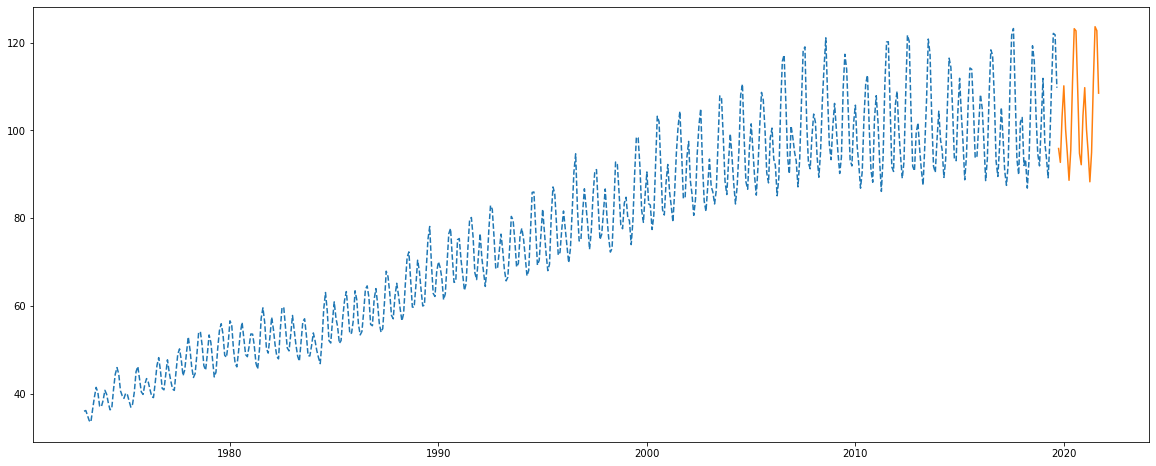

In [121]:

plt.figure(figsize=(20,8))
plt.plot(ts, '--', label='obs')
plt.plot(SARIMA_forcast, '-', label=SARIMA_forcast)

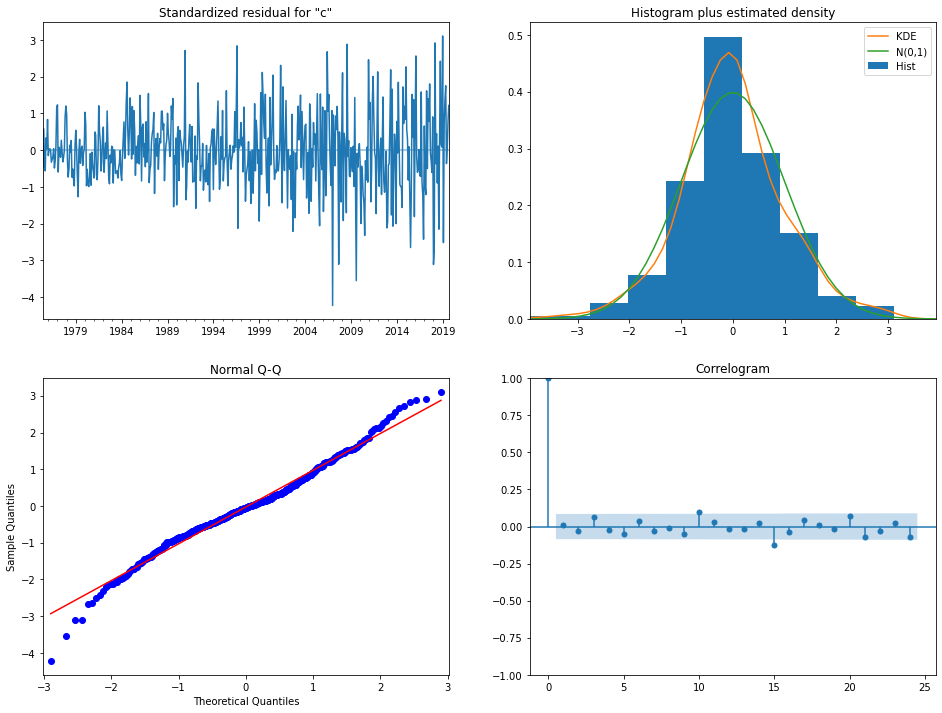

In [122]:
SARIMA_model.plot_diagnostics(lags=24, figsize=(16,12))
plt.show()


========================================================================================================================

#### * As the MAPE of ETS model and SARIMA model is almost similar but the RMSPE of SARIMA model is almost double of ETS model. So ETS model is working well as compare to SARIMA.

========================================================================================================================